# Multiple Features or Multi variable Regression

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('homeprices multivariable.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
median_bedroom = df.bedrooms.median()
median_bedroom

4.0

In [6]:
df.bedrooms.fillna(median_bedroom, inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
df[['area','bedrooms','age']]

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [8]:
model = LinearRegression()
model.fit(df[['area','bedrooms','age']], df.price) # train the model

LinearRegression()

In [9]:
model.predict([[3500,5,10]])

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([698168.76996624])

In [10]:
model.intercept_

221323.00186540384

In [11]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [12]:
# ax1 + bx2 + cx3 + d

112.06244194 * 3500 + 23388.88007794 * 5 + -3231.71790863 * 10 + 221323.00186540384

698168.7699588039

# Excercise

In [14]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df.experience.fillna('zero', inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


<Axes: >

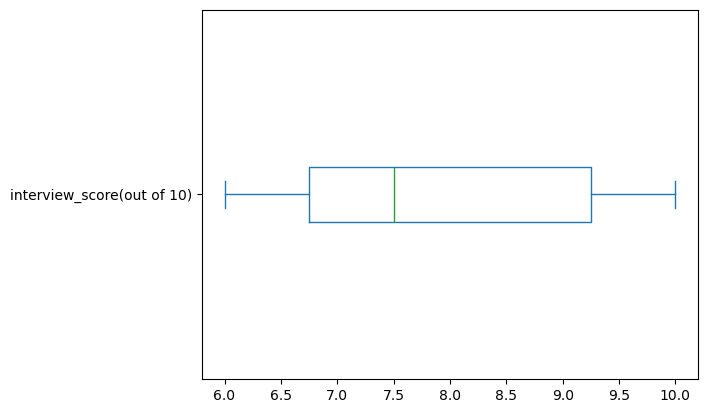

In [17]:
df['interview_score(out of 10)'].plot.box(vert=False)

# change Ordinal data into numeric data

In [19]:
# pip install word2number

In [20]:
from word2number import w2n

In [21]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [22]:
df[['experience','test_score(out of 10)','interview_score(out of 10)']]

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [23]:
model = LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],
          df['salary($)']) # train the model

LinearRegression()

# Predict the salary

In [47]:
model.predict([[15,9,10]])

/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98595.34206696])